# Table of Contents

## Preparation

This section is where we prepare for the project, through a variety of initial steps. The steps in this section are as follows:

- Importing Packages
- Importing Data
- Dropping NA Values
- Subsetting Data

### Importing Packages

In [1]:
#Data management
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport

#TextBlob Features
from textblob import TextBlob

#Plotting
import matplotlib.pyplot as plt

#SciKit-Learn
from sklearn.model_selection import train_test_split

#nltk
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

#Tensorflow / Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

### Importing Data

In [2]:
#Training Data
path = "../data/raw/twitter_training.csv"
train_df = pd.read_csv(path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

#Test Data (Not to be used until the full model has been trained)
test_path = "../data/raw/twitter_validation.csv"
test_df = pd.read_csv(test_path, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

### Dropping NA Values

Here, we drop any rows with null values, as these miss out on key information.

In [3]:
test_df = test_df.dropna()

### Subsetting Data

As this dataset is quite large, during the exploration process we begin by subsetting the data during the training process, to speed up any testing steps.

In [4]:
df = train_df.sample(frac=0.01)

## Data Exploration

Here, we explore the data, testing if it is balanced, and checking for patterns in missing rows. This can generally be done in an automated fashion with pandas-profiling. The sections under this header include:

- Basic visualisation
- Automated Data Exploration with pandas-profiling
- Checking for balance in output categories

### Basic Visualisation

We can display basic statistics about the data using pandas, and also view a few entries of the dataset, to see example points with which we'll work.

In [5]:
#See overall information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 66716 to 23381
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       747 non-null    int64 
 1   Entity         747 non-null    object
 2   Sentiment      747 non-null    object
 3   Tweet_Content  741 non-null    object
dtypes: int64(1), object(3)
memory usage: 29.2+ KB


In [6]:
#Display a few entries
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
66716,7024,johnson&johnson,Negative,Johnson & Johnson knowingly sold baby powder c...
44820,11697,Verizon,Positive,Thank you @verizon I was so worried I wouldn’t...
8558,9468,Overwatch,Irrelevant,"Umma... Universal chatter is Wildin... """
2838,1693,CallOfDutyBlackopsColdWar,Irrelevant,youtube.com/watch?v=Y-yOf8… we life
59800,3449,Facebook,Neutral,In the Facebook jail for literally fucking not...


### Automated Data Exploration with Pandas-Profiling

Pandas-profiling is a library used to automatically explore data. This gives us a good overview of the dataset, which we can use to inform our later work.

In [7]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

### Checking Balance of the Data in Output Categories

We want to check the balance of the output column (Sentiment), such that we don't train a model that always predicts one output. This model might have a high accuracy, but we wouldn't have learned anything about trends in the data, other than the count in the most common sentiment. It might be tempting to think about balancing the test data too, but remember that data in the real world will be unlikely to come nicely balanced, and test data is analagous to real world data


The proportion of sentiments ranges from about 0.15 to 0.3, which is generally good balance, such that we are unlikely to see a scenario in which only one class is predicted. We will however be looking out for if our training accuracy forms a plateau at about 0.3, which could be indicative of this problem.

<BarContainer object of 4 artists>

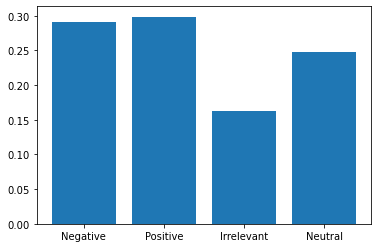

In [8]:
#Checking balance of target classes
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) / len(df) for sentiment in sentiments]

plt.bar(sentiments, sentiment_nums)

## Basic Data Enrichment

Here, we consider basic features that can enhance the dataset. This will include one-hot encoding of the categorical "Entity" variable. We can also use pre-trained NLP systems here to extract features from the text, such as the one from TextBlob, giving us a "polarity" and "subjectivity" value from any text that we give it. These extra features are added to the dataframe. Sections under this header include:

- One-Hot Encoding
- Enrichment with Pre-Trained NLP Models (TextBlob)

### One-Hot Encoding

Here, we create a Boolean column for each possible entity, as there are only 32 of these. 32 columns are added, each signifying if the Tweet was related to the given entity. Each Tweet will only be related to one entity in total.

In [9]:
#View all possible entities
print(df["Entity"].unique())
print(len(df["Entity"].unique()))

['johnson&johnson' 'Verizon' 'Overwatch' 'CallOfDutyBlackopsColdWar'
 'Facebook' 'TomClancysRainbowSix' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'Borderlands'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Dota2' 'Nvidia' 'Fortnite'
 'GrandTheftAuto(GTA)' 'Microsoft' 'Google' 'ApexLegends'
 'PlayStation5(PS5)' 'Xbox(Xseries)' 'Hearthstone' 'WorldOfCraft' 'Amazon'
 'CallOfDuty' 'Cyberpunk2077' 'Battlefield' 'MaddenNFL' 'LeagueOfLegends'
 'CS-GO' 'TomClancysGhostRecon' 'NBA2K' 'AssassinsCreed']
32


In [10]:
#One-hot encode using Pandas' get_dummies()
onehot = pd.get_dummies(df["Entity"])

#Join these new columns back into the DataFrame
df = df.join(onehot)

#Display a sample of the data with our new columns
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
66716,7024,johnson&johnson,Negative,Johnson & Johnson knowingly sold baby powder c...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44820,11697,Verizon,Positive,Thank you @verizon I was so worried I wouldn’t...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8558,9468,Overwatch,Irrelevant,"Umma... Universal chatter is Wildin... """,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2838,1693,CallOfDutyBlackopsColdWar,Irrelevant,youtube.com/watch?v=Y-yOf8… we life,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59800,3449,Facebook,Neutral,In the Facebook jail for literally fucking not...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Remove the Entity column, as we have transformed this data into a more usable format

df = df.drop("Entity", axis=1)

### Enrichment with Pre-Trained Models (TextBlob)

Here, we use the built-in functionality of TextBlob to add dimensionality to the data, by using it to analyse the text of the "Tweet_Content" column, and storing the outputs in a new column.

# BEGIN AGAIN FROM HERE

In [18]:
#Adding dimensions with textblob
def tb_enrich(ls):
    #Enriches a column of text with TextBlob Sentiment Analysis outputs
    tb_polarity = []
    tb_subject = []

    for tweet in ls:
        try:
            tb_polarity.append(TextBlob(tweet).sentiment[0])
            tb_subject.append(TextBlob(tweet).sentiment[1])
        except:
            print(tweet)
            if np.isnan(tweet):
                print("AAh")
            raise NotImplementedError
    

    return tb_polarity, tb_subject
    
df["Polarity"], df["Subjectivity"] = tb_enrich(list(df["Tweet_Content"]))

nan
AAh


NotImplementedError: 

In [ ]:
df.head()

Will likely go under a header like "data enrichment and editing"
- Creating Indexers for the Output Sentiments

In [22]:
count_na = len([np.isnan(tweet) for tweet in list(df["Tweet_Content"])])
count_na

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''